In [250]:

# IMPORT NECESSARY LIBRARIES
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [251]:
X, sr = librosa.load('/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_01/03-01-01-01-01-01-01.wav')

In [ ]:
#display the waveplot 
plt.figure(figsize=(8,4))
librosa.display.waveplot(X, sr=sr)
plt.title('Waveplot- Male Neutral')
plt.savefig('Waveplot_MaleNeutral.png')

Feature Extraction of the sound waves 


In [ ]:
#Making the mel spectogram of the wave file 
spectogram = librosa.feature.melspectrogram(y=X, sr=sr, n_mels=128, fmax=8000)
spectogram = librosa.power_to_db(spectogram)

librosa.display.specshow(spectogram, y_axis='mel', fmax = 8000, x_axis='time')
plt.title('Mel Spectogram - Male Neautral')
plt.savefig('Melspec_MaleNeutral.png')
plt.colorbar(format='%+2.0f dB');

In [ ]:
x, sr = librosa.load('/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_02/03-01-02-01-01-01-02.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Calm')
plt.savefig('Waveplot_FemaleCalm.png')

In [ ]:
# CREATE LOG MEL SPECTROGRAM
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Calm')
plt.savefig('MelSpec_FemaleCalm.png')
plt.colorbar(format='%+2.0f dB');

In [ ]:
x, sr = librosa.load('/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_03/03-01-03-01-01-01-03.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Happy ')
plt.savefig('Waveplot_MaleHappy.png')

In [ ]:
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
x= librosa.power_to_db(x)

librosa.display.specshow(x, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Happy')
plt.savefig('MelSpec_MaleHappy.png')
plt.colorbar(format='%+2.0f dB');

In [ ]:
x, sr = librosa.load('/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_04/03-01-04-01-01-01-04.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Sad ')
plt.savefig('Waveplot_FemaleSad.png')

In [ ]:
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Sad');
plt.savefig('MelSpec_FemaleSad.png')
plt.colorbar(format='%+2.0f dB');

In [ ]:
x,sr = librosa.load('/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_05/03-01-05-01-01-01-05.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Angry')
plt.savefig('Waveplot_MaleAngry.png')
 

In [ ]:

x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Angry');
plt.savefig('MelSpec_MaleAngry.png')
plt.colorbar(format='%+2.0f dB');


In [ ]:
x,sr = librosa.load('/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_06/03-01-06-01-01-01-06.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Fearful ')
plt.savefig('Waveplot_FemaleFearful.png')

In [ ]:
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Fearful')
plt.savefig('MelSpec_FemaleFearful.png')
plt.colorbar(format='%+2.0f dB');

Date Pre Processing 


Labelling Audio FIles


In [252]:
audio = "/home/divyansh/Divyansh/projects/senti_random_forest/data/"
actor_folders = os.listdir(audio)
actor_folders.sort()
actor_folders[0:5]

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05']

In [253]:
# CREATE FUNCTION TO EXTRACT EMOTION NUMBER, ACTOR AND GENDER LABEL
emotion = []
gender = []
actor = []
file_path = []
for i in actor_folders:
    filename = os.listdir(audio + i) #iterate over Actor folders
    for f in filename: # go through files in Actor folder
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        actor.append(int(part[6]))
        bg = int(part[6])
        if bg%2 == 0:
            bg = "female"
        else:
            bg = "male"
        gender.append(bg)
        file_path.append(audio + i + '/' + f)

In [254]:
# PUT EXTRACTED LABELS WITH FILEPATH INTO DATAFRAME
audio_df = pd.DataFrame(emotion)
audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
audio_df = pd.concat([pd.DataFrame(gender),audio_df,pd.DataFrame(actor)],axis=1)
audio_df.columns = ['gender','emotion','actor']
audio_df = pd.concat([audio_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)
audio_df

,gender,emotion,actor,path
0,male,neutral,1,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_01/03-01-01-01-02-02-01.wav
1,male,fear,1,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_01/03-01-06-02-02-01-01.wav
2,male,angry,1,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_01/03-01-05-02-01-01-01.wav
3,male,happy,1,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_01/03-01-03-02-01-02-01.wav
4,male,sad,1,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_01/03-01-04-01-02-01-01.wav
...,...,...,...,...
1435,female,sad,24,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_24/03-01-04-01-01-02-24.wav
1436,female,fear,24,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_24/03-01-06-01-01-01-24.wav
1437,female,calm,24,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_24/03-01-02-01-02-01-24.wav
1438,female,surprise,24,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_24/03-01-08-01-01-02-24.wav


In [255]:
# ENSURE GENDER,EMOTION, AND ACTOR COLUMN VALUES ARE CORRECT
pd.set_option('display.max_colwidth', -1)

audio_df.sample(10)

,gender,emotion,actor,path
1018,male,disgust,17,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_17/03-01-07-01-01-01-17.wav
1223,male,calm,21,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_21/03-01-02-01-02-02-21.wav
322,female,angry,6,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_06/03-01-05-01-01-02-06.wav
468,female,sad,8,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_08/03-01-04-02-02-01-08.wav
598,female,neutral,10,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_10/03-01-01-01-02-01-10.wav
12,male,happy,1,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_01/03-01-03-01-01-01-01.wav
815,female,happy,14,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_14/03-01-03-01-01-01-14.wav
1058,female,surprise,18,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_18/03-01-08-01-02-02-18.wav
1171,female,angry,20,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_20/03-01-05-01-01-02-20.wav
210,female,fear,4,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_04/03-01-06-01-01-02-04.wav


<AxesSubplot:>

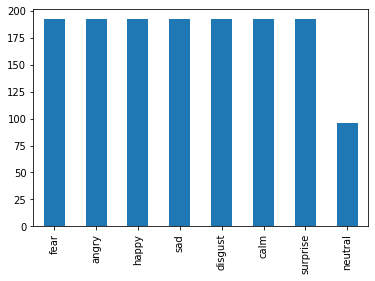

In [256]:
#distribution of the classes 

audio_df.emotion.value_counts().plot(kind = 'bar')

In [257]:
audio_df.to_csv('audio.csv')

Feature Extraction of the dataset '

In [258]:
df = pd.DataFrame(columns=['mel_spectrogram'])

counter=0

for index,path in enumerate(audio_df.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)
    
    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000) 
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)
        
    # Mel-frequency cepstral coefficients (MFCCs)
#     mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
#     mfcc=np.mean(mfcc,axis=0)
    
    # compute chroma energy (pertains to 12 different pitch classes)
#     chroma = librosa.feature.chroma_stft(y=X, sr=sample_rate)
#     chroma = np.mean(chroma, axis = 0)

    # compute spectral contrast
#     contrast = librosa.feature.spectral_contrast(y=X, sr=sample_rate)
#     contrast = np.mean(contrast, axis= 0)

    # compute zero-crossing-rate (zcr:the zcr is the rate of sign changes along a signal i.e.m the rate at 
#     which the signal changes from positive to negative or back - separation of voiced andunvoiced speech.)
#     zcr = librosa.feature.zero_crossing_rate(y=X)
#     zcr = np.mean(zcr, axis= 0)
    
    df.loc[counter] = [log_spectrogram]
    counter=counter+1   

print(len(df))
df.head()

1440


,mel_spectrogram
0,"[-75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.243004, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.24528, -75.04568, -74.99168, -75.19989, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -74.34854, -73.92539, -73.56352, -73.27889, -72.94659, -72.36573, -72.77169, -62.66063, -41.765488, -35.625652, -32.697567, -31.232754, -29.582478, -29.005156, -28.940495, -28.66669, -28.22058, -27.420063, -26.695297, -26.731213, -27.104462, -28.481537, -30.688972, -32.87745, -36.790688, -41.635178, -41.879257, -40.09379, -39.499546, -39.355, -39.876854, -40.17552, -38.197384, -36.35471, -34.195213, -33.323788, -33.642143, -33.76531, -34.102013, -35.33318, -36.94313, -37.931232, -39.940765, -39.828728, -39.29128, -37.974392, -39.12242, -41.313232, -35.535824, -33.189327, -33.90681, -36.375805, -41.008472, -43.743633, -40.78038, -37.379166, -36.989563, -37.33643, -38.593864, -41.70642, -45.89121, -46.88004, -47.354614, -47.581882, -45.365158, ...]"
1,"[-43.028713, -43.042988, -43.261326, -42.436676, -41.737343, -41.918777, -41.700493, -41.38073, -41.041134, -40.574318, -41.192196, -42.523743, -42.336243, -41.857025, -42.272514, -43.269135, -43.338387, -44.221283, -44.960804, -46.748035, -48.125107, -48.855724, -49.467484, -50.345325, -48.941998, -44.17935, -40.01212, -37.089638, -35.32121, -34.895355, -35.560318, -35.555264, -35.81766, -36.33105, -36.55279, -36.600067, -36.2273, -36.35361, -37.47603, -41.31337, -46.042812, -47.625626, -48.34291, -48.901985, -35.811287, -25.920439, -18.781908, -16.386158, -16.196274, -16.26944, -16.687273, -16.451473, -15.611079, -14.411495, -14.457534, -14.510024, -13.268233, -12.913103, -13.493089, -14.515449, -15.185567, -15.321195, -15.306486, -14.600651, -16.447802, -18.770077, -19.140423, -21.407412, -23.287226, -25.478472, -26.747784, -26.985826, -27.32007, -26.5274, -23.278358, -21.406454, -22.40988, -23.768742, -24.936504, -26.709251, -27.821743, -27.024046, -26.639101, -21.426641, -18.178528, -17.563513, -16.355236, -16.689686, -18.143007, -19.032894, -20.171343, -19.96009, -17.469196, -16.460592, -14.764888, -16.625284, -18.046984, -17.222048, -16.816572, -18.18617, ...]"
2,"[-49.169304, -49.169304, -48.407005, -44.851994, -41.615692, -39.319164, -38.613216, -39.014965, -38.350555, -38.879425, -39.21237, -39.007713, -39.95953, -39.751186, -39.00466, -39.766716, -40.59281, -41.387615, -42.200356, -44.479523, -45.43372, -45.964226, -46.561657, -46.340202, -44.12076, -40.982986, -37.545105, -35.668, -34.09041, -33.58697, -33.61325, -33.51587, -34.21115, -35.118176, -34.759842, -35.898335, -37.47699, -38.630596, -40.237854, -43.171253, -46.87981, -48.425957, -48.949078, -48.725376, -48.703987, -29.322607, -16.527185, -11.782075, -9.047266, -7.906037, -8.883454, -8.4279, -6.593108, -5.316847, -4.1972303, -4.651101, -5.469242, -7.382365, -9.542135, -12.091637, -12.540533, -12.502799, -12.916551, -14.18152, -16.802063, -19.036493, -21.741278, -24.909338, -28.164541, -30.384193, -31.19883, -30.823864, -30.59219, -30.009787, -26.582008, -23.80054, -23.131863, -19.76525, -17.318985, -13.968798, -11.6600485, -12.221695, -12.281469, -12.663868, -13.4554205, -13.260431, -13.227063, -12.772096, -13.571883, -14.337068, -15.031982, -14.852538, -16.975079, -21.94795, -25.404297, -27.462837, -30.186047, -33.06932, -35.471348, -33.26883, ...]"
3,"[-64.49623, -64.50452, -64.19428, -63.729504, -63.093285, -62.56594, -62.86212, -62.730785, -62.05913, -61.377228, -61.306168, -62.03788, -62.33126, -63.488583, -64.17275, -64.18877, -64.435555, -64.50778, -64.50778, -64.50778, -64.50778, -64.50778, -64.50778, -64.50778, -64.37521, -62.62585, -60.594543, -59.3886, -59.616817, -60.186497, -60.93017, -62.789967, -63.87934, -64.11565, -64.48413, -64.50778, -64.50778, -64.50778, -64.42219, -62.039406, -62.37523, -63

In [259]:
print(len(df))
df.head()

1440


,mel_spectrogram
0,"[-75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.243004, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.24528, -75.04568, -74.99168, -75.19989, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -74.34854, -73.92539, -73.56352, -73.27889, -72.94659, -72.36573, -72.77169, -62.66063, -41.765488, -35.625652, -32.697567, -31.232754, -29.582478, -29.005156, -28.940495, -28.66669, -28.22058, -27.420063, -26.695297, -26.731213, -27.104462, -28.481537, -30.688972, -32.87745, -36.790688, -41.635178, -41.879257, -40.09379, -39.499546, -39.355, -39.876854, -40.17552, -38.197384, -36.35471, -34.195213, -33.323788, -33.642143, -33.76531, -34.102013, -35.33318, -36.94313, -37.931232, -39.940765, -39.828728, -39.29128, -37.974392, -39.12242, -41.313232, -35.535824, -33.189327, -33.90681, -36.375805, -41.008472, -43.743633, -40.78038, -37.379166, -36.989563, -37.33643, -38.593864, -41.70642, -45.89121, -46.88004, -47.354614, -47.581882, -45.365158, ...]"
1,"[-43.028713, -43.042988, -43.261326, -42.436676, -41.737343, -41.918777, -41.700493, -41.38073, -41.041134, -40.574318, -41.192196, -42.523743, -42.336243, -41.857025, -42.272514, -43.269135, -43.338387, -44.221283, -44.960804, -46.748035, -48.125107, -48.855724, -49.467484, -50.345325, -48.941998, -44.17935, -40.01212, -37.089638, -35.32121, -34.895355, -35.560318, -35.555264, -35.81766, -36.33105, -36.55279, -36.600067, -36.2273, -36.35361, -37.47603, -41.31337, -46.042812, -47.625626, -48.34291, -48.901985, -35.811287, -25.920439, -18.781908, -16.386158, -16.196274, -16.26944, -16.687273, -16.451473, -15.611079, -14.411495, -14.457534, -14.510024, -13.268233, -12.913103, -13.493089, -14.515449, -15.185567, -15.321195, -15.306486, -14.600651, -16.447802, -18.770077, -19.140423, -21.407412, -23.287226, -25.478472, -26.747784, -26.985826, -27.32007, -26.5274, -23.278358, -21.406454, -22.40988, -23.768742, -24.936504, -26.709251, -27.821743, -27.024046, -26.639101, -21.426641, -18.178528, -17.563513, -16.355236, -16.689686, -18.143007, -19.032894, -20.171343, -19.96009, -17.469196, -16.460592, -14.764888, -16.625284, -18.046984, -17.222048, -16.816572, -18.18617, ...]"
2,"[-49.169304, -49.169304, -48.407005, -44.851994, -41.615692, -39.319164, -38.613216, -39.014965, -38.350555, -38.879425, -39.21237, -39.007713, -39.95953, -39.751186, -39.00466, -39.766716, -40.59281, -41.387615, -42.200356, -44.479523, -45.43372, -45.964226, -46.561657, -46.340202, -44.12076, -40.982986, -37.545105, -35.668, -34.09041, -33.58697, -33.61325, -33.51587, -34.21115, -35.118176, -34.759842, -35.898335, -37.47699, -38.630596, -40.237854, -43.171253, -46.87981, -48.425957, -48.949078, -48.725376, -48.703987, -29.322607, -16.527185, -11.782075, -9.047266, -7.906037, -8.883454, -8.4279, -6.593108, -5.316847, -4.1972303, -4.651101, -5.469242, -7.382365, -9.542135, -12.091637, -12.540533, -12.502799, -12.916551, -14.18152, -16.802063, -19.036493, -21.741278, -24.909338, -28.164541, -30.384193, -31.19883, -30.823864, -30.59219, -30.009787, -26.582008, -23.80054, -23.131863, -19.76525, -17.318985, -13.968798, -11.6600485, -12.221695, -12.281469, -12.663868, -13.4554205, -13.260431, -13.227063, -12.772096, -13.571883, -14.337068, -15.031982, -14.852538, -16.975079, -21.94795, -25.404297, -27.462837, -30.186047, -33.06932, -35.471348, -33.26883, ...]"
3,"[-64.49623, -64.50452, -64.19428, -63.729504, -63.093285, -62.56594, -62.86212, -62.730785, -62.05913, -61.377228, -61.306168, -62.03788, -62.33126, -63.488583, -64.17275, -64.18877, -64.435555, -64.50778, -64.50778, -64.50778, -64.50778, -64.50778, -64.50778, -64.50778, -64.37521, -62.62585, -60.594543, -59.3886, -59.616817, -60.186497, -60.93017, -62.789967, -63.87934, -64.11565, -64.48413, -64.50778, -64.50778, -64.50778, -64.42219, -62.039406, -62.37523, -63

In [260]:
# TURN ARRAY INTO LIST AND JOIN WITH AUDIO_DF TO GET CORRESPONDING EMOTION LABELS
df_combined = pd.concat([audio_df,pd.DataFrame(df['mel_spectrogram'].values.tolist())],axis=1)
df_combined = df_combined.fillna(0)

In [261]:
# DROP PATH COLUMN FOR MODELING
df_combined.drop(columns='path',inplace=True)

In [262]:
# CHECK TOP 5 ROWS
df_combined.head()

,gender,emotion,actor,0,1,2,3,4,5,6,...,249,250,251,252,253,254,255,256,257,258
0,male,neutral,1,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,male,fear,1,-43.028713,-43.042988,-43.261326,-42.436676,-41.737343,-41.918777,-41.700493,...,-48.049362,-47.871559,-48.175350,-47.647198,-47.706913,-47.848614,-47.812244,-48.084160,-48.301369,-48.892868
2,male,angry,1,-49.169304,-49.169304,-48.407005,-44.851994,-41.615692,-39.319164,-38.613216,...,-49.169304,-49.169304,-49.169304,-49.169304,-49.169304,-49.169304,-49.169304,-49.169304,-49.169304,-49.169304
3,male,happy,1,-64.496231,-64.504517,-64.194283,-63.729504,-63.093285,-62.565941,-62.862122,...,-64.507782,-64.507782,-64.507782,-64.507782,-64.507782,-64.507782,-64.507782,-64.507782,-64.507782,-64.507782
4,male,sad,1,-79.944366,-79.944366,-79.944366,-79.944366,-79.944366,-79.944366,-79.944366,...,-79.944366,-79.944366,-79.944366,-79.944366,-79.944366,-79.944366,-79.944366,-79.944366,-79.944366,-79.944366


In [263]:
df_combined.head()

,gender,emotion,actor,0,1,2,3,4,5,6,...,249,250,251,252,253,254,255,256,257,258
0,male,neutral,1,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,-75.268448,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,male,fear,1,-43.028713,-43.042988,-43.261326,-42.436676,-41.737343,-41.918777,-41.700493,...,-48.049362,-47.871559,-48.175350,-47.647198,-47.706913,-47.848614,-47.812244,-48.084160,-48.301369,-48.892868
2,male,angry,1,-49.169304,-49.169304,-48.407005,-44.851994,-41.615692,-39.319164,-38.613216,...,-49.169304,-49.169304,-49.169304,-49.169304,-49.169304,-49.169304,-49.169304,-49.169304,-49.169304,-49.169304
3,male,happy,1,-64.496231,-64.504517,-64.194283,-63.729504,-63.093285,-62.565941,-62.862122,...,-64.507782,-64.507782,-64.507782,-64.507782,-64.507782,-64.507782,-64.507782,-64.507782,-64.507782,-64.507782
4,male,sad,1,-79.944366,-79.944366,-79.944366,-79.944366,-79.944366,-79.944366,-79.944366,...,-79.944366,-79.944366,-79.944366,-79.944366,-79.944366,-79.944366,-79.944366,-79.944366,-79.944366,-79.944366


In [264]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [265]:
# TRAIN TEST SPLIT DATA
train,test = train_test_split(df_combined, test_size=0.2, random_state=0,
                               stratify=df_combined[['emotion','gender','actor']])

In [266]:
X_train = train.iloc[:, 3:]
y_train = train.iloc[:,:2].drop(columns=['gender'])
print(X_train.shape)

(1152, 259)


In [267]:

X_test = test.iloc[:,3:]
y_test = test.iloc[:,:2].drop(columns=['gender'])
print(X_test.shape)

(288, 259)


In [268]:
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [269]:
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


In [270]:
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))


In [271]:
print(y_test[0:10])

[[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]]


In [272]:
print(lb.classes_)

['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


In [273]:
# RESHAPE DATA TO INCLUDE 3D TENSOR 
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

X_train.shape

(1152, 259, 1)

In [274]:
X_train.shape

(1152, 259, 1)

In [275]:
X_test.shape

(288, 259, 1)

In [276]:
import numpy as np
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)
DummyClassifier(strategy='stratified')
dummy_clf.predict(X_test)
dummy_clf.score(X_test, y_test)

0.052083333333333336

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

In [277]:
df

,mel_spectrogram
0,"[-75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.243004, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.24528, -75.04568, -74.99168, -75.19989, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -75.26845, -74.34854, -73.92539, -73.56352, -73.27889, -72.94659, -72.36573, -72.77169, -62.66063, -41.765488, -35.625652, -32.697567, -31.232754, -29.582478, -29.005156, -28.940495, -28.66669, -28.22058, -27.420063, -26.695297, -26.731213, -27.104462, -28.481537, -30.688972, -32.87745, -36.790688, -41.635178, -41.879257, -40.09379, -39.499546, -39.355, -39.876854, -40.17552, -38.197384, -36.35471, -34.195213, -33.323788, -33.642143, -33.76531, -34.102013, -35.33318, -36.94313, -37.931232, -39.940765, -39.828728, -39.29128, -37.974392, -39.12242, -41.313232, -35.535824, -33.189327, -33.90681, -36.375805, -41.008472, -43.743633, -40.78038, -37.379166, -36.989563, -37.33643, -38.593864, -41.70642, -45.89121, -46.88004, -47.354614, -47.581882, -45.365158, ...]"
1,"[-43.028713, -43.042988, -43.261326, -42.436676, -41.737343, -41.918777, -41.700493, -41.38073, -41.041134, -40.574318, -41.192196, -42.523743, -42.336243, -41.857025, -42.272514, -43.269135, -43.338387, -44.221283, -44.960804, -46.748035, -48.125107, -48.855724, -49.467484, -50.345325, -48.941998, -44.17935, -40.01212, -37.089638, -35.32121, -34.895355, -35.560318, -35.555264, -35.81766, -36.33105, -36.55279, -36.600067, -36.2273, -36.35361, -37.47603, -41.31337, -46.042812, -47.625626, -48.34291, -48.901985, -35.811287, -25.920439, -18.781908, -16.386158, -16.196274, -16.26944, -16.687273, -16.451473, -15.611079, -14.411495, -14.457534, -14.510024, -13.268233, -12.913103, -13.493089, -14.515449, -15.185567, -15.321195, -15.306486, -14.600651, -16.447802, -18.770077, -19.140423, -21.407412, -23.287226, -25.478472, -26.747784, -26.985826, -27.32007, -26.5274, -23.278358, -21.406454, -22.40988, -23.768742, -24.936504, -26.709251, -27.821743, -27.024046, -26.639101, -21.426641, -18.178528, -17.563513, -16.355236, -16.689686, -18.143007, -19.032894, -20.171343, -19.96009, -17.469196, -16.460592, -14.764888, -16.625284, -18.046984, -17.222048, -16.816572, -18.18617, ...]"
2,"[-49.169304, -49.169304, -48.407005, -44.851994, -41.615692, -39.319164, -38.613216, -39.014965, -38.350555, -38.879425, -39.21237, -39.007713, -39.95953, -39.751186, -39.00466, -39.766716, -40.59281, -41.387615, -42.200356, -44.479523, -45.43372, -45.964226, -46.561657, -46.340202, -44.12076, -40.982986, -37.545105, -35.668, -34.09041, -33.58697, -33.61325, -33.51587, -34.21115, -35.118176, -34.759842, -35.898335, -37.47699, -38.630596, -40.237854, -43.171253, -46.87981, -48.425957, -48.949078, -48.725376, -48.703987, -29.322607, -16.527185, -11.782075, -9.047266, -7.906037, -8.883454, -8.4279, -6.593108, -5.316847, -4.1972303, -4.651101, -5.469242, -7.382365, -9.542135, -12.091637, -12.540533, -12.502799, -12.916551, -14.18152, -16.802063, -19.036493, -21.741278, -24.909338, -28.164541, -30.384193, -31.19883, -30.823864, -30.59219, -30.009787, -26.582008, -23.80054, -23.131863, -19.76525, -17.318985, -13.968798, -11.6600485, -12.221695, -12.281469, -12.663868, -13.4554205, -13.260431, -13.227063, -12.772096, -13.571883, -14.337068, -15.031982, -14.852538, -16.975079, -21.94795, -25.404297, -27.462837, -30.186047, -33.06932, -35.471348, -33.26883, ...]"
3,"[-64.49623, -64.50452, -64.19428, -63.729504, -63.093285, -62.56594, -62.86212, -62.730785, -62.05913, -61.377228, -61.306168, -62.03788, -62.33126, -63.488583, -64.17275, -64.18877, -64.435555, -64.50778, -64.50778, -64.50778, -64.50778, -64.50778, -64.50778, -64.50778, -64.37521, -62.62585, -60.594543, -59.3886, -59.616817, -60.186497, -60.93017, -62.789967, -63.87934, -64.11565, -64.48413, -64.50778, -64.50778, -64.50778, -64.42219, -62.039406, -62.37523, -63

In [278]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

#BUILD 1D CNN LAYERS
model = tf.keras.Sequential()
model.add(layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(8, activation='sigmoid'))
opt = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 250, 64)           704       
                                                                 
 conv1d_19 (Conv1D)          (None, 241, 128)          82048     
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 30, 128)          0         
 g1D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 30, 128)           0         
                                                                 
 conv1d_20 (Conv1D)          (None, 21, 128)           163968    
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 2, 128)           0         
 g1D)                                                 

In [279]:
import tensorflow.keras as keras

# FIT MODEL AND USE CHECKPOINT TO SAVE BEST MODEL
checkpoint = ModelCheckpoint("best_initial_model.hdf5", monitor='val_accuracy', verbose=1,
    save_best_only=True, mode='max', period=1, save_weights_only=True)

model_history=model.fit(X_train, y_train,batch_size=32, epochs=40, validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/40
35/36 [============================>.] - ETA: 0s - loss: 2.5250 - accuracy: 0.2152
Epoch 00001: val_accuracy improved from -inf to 0.25694, saving model to best_initial_model.hdf5
36/36 [==============================] - 3s 65ms/step - loss: 2.5139 - accuracy: 0.2170 - val_loss: 2.1633 - val_accuracy: 0.2569
Epoch 2/40
35/36 [============================>.] - ETA: 0s - loss: 2.0728 - accuracy: 0.2705
Epoch 00002: val_accuracy improved from 0.25694 to 0.30903, saving model to best_initial_model.hdf5
36/36 [==============================] - 2s 51ms/step - loss: 2.0622 - accuracy: 0.2726 - val_loss: 1.9092 - val_accuracy: 0.3090
Epoch 3/40
36/36 [==============================] - ETA: 0s - loss: 1.8636 - accuracy: 0.3177
Epoch 00003: val_accuracy improved from 0.30903 to 0.31597, saving model to best_initial_model.hdf5
36/36 [==============================] - 2s 50ms/step - loss: 1.8636 - accuracy: 0.3177 - val_loss: 1.8159 - val_accuracy: 0.3160
Epoch 4/40
36/36 [=============

36/36 [==============================] - ETA: 0s - loss: 1.3168 - accuracy: 0.5243
Epoch 00028: val_accuracy did not improve from 0.49653
36/36 [==============================] - 2s 53ms/step - loss: 1.3168 - accuracy: 0.5243 - val_loss: 1.3947 - val_accuracy: 0.4965
Epoch 29/40
36/36 [==============================] - ETA: 0s - loss: 1.3098 - accuracy: 0.5217
Epoch 00029: val_accuracy did not improve from 0.49653
36/36 [==============================] - 2s 52ms/step - loss: 1.3098 - accuracy: 0.5217 - val_loss: 1.4228 - val_accuracy: 0.4583
Epoch 30/40
36/36 [==============================] - ETA: 0s - loss: 1.2947 - accuracy: 0.5191
Epoch 00030: val_accuracy did not improve from 0.49653
36/36 [==============================] - 2s 49ms/step - loss: 1.2947 - accuracy: 0.5191 - val_loss: 1.4244 - val_accuracy: 0.4688
Epoch 31/40
36/36 [==============================] - ETA: 0s - loss: 1.2564 - accuracy: 0.5634
Epoch 00031: val_accuracy did not improve from 0.49653
36/36 [===============

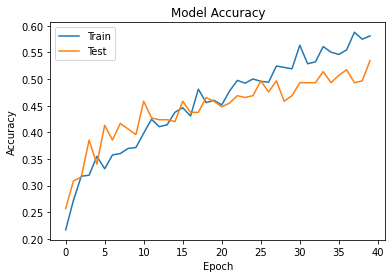

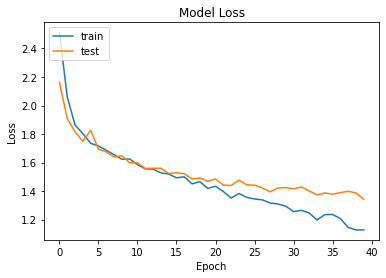

In [280]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('Initial_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Initial_Model_loss.png')
plt.show()

In [281]:
#Lets do some predictions shall we 

print("lOSS OF THE MODEL IS --", model.evaluate(X_test, y_test)[0])
print("Accuracy of the model is", model.evaluate(X_test,y_test)[1] * 100, "%")

9/9 [==============================] - 0s 11ms/step - loss: 1.3429 - accuracy: 0.5347
lOSS OF THE MODEL IS -- 1.3428966999053955
9/9 [==============================] - 0s 12ms/step - loss: 1.3429 - accuracy: 0.5347
Accuracy of the model is 53.47222089767456 %


In [282]:
#predictions 
predictions = model.predict(X_test)
predictions = predictions.argmax(axis=1)


In [283]:
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform(predictions))

In [284]:
predictions = pd.DataFrame({'Predicted Values': predictions})

In [285]:
actual = y_test.argmax(axis = 1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform(actual))
actual = pd.DataFrame({'Actual values': actual})

finaldf = actual.join(predictions)
finaldf

,Actual values,Predicted Values
0,fear,surprise
1,calm,calm
2,happy,happy
3,angry,angry
4,fear,surprise
...,...,...
283,disgust,disgust
284,calm,calm
285,calm,neutral
286,sad,sad


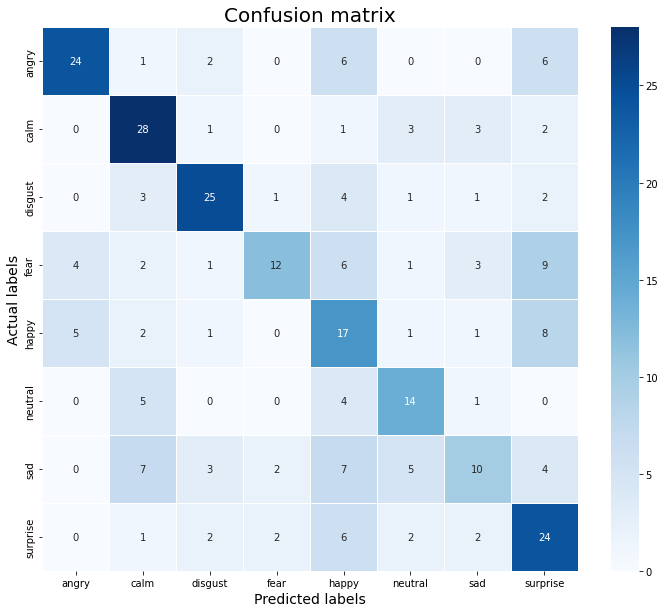

In [286]:
#confusion matrix bcpz why the fuck not

cm = confusion_matrix(actual, predictions)
plt.figure(figsize=(12,10))
cm = pd.DataFrame(cm, index= [i for i in lb.classes_], columns= [i for i in lb.classes_])
ax = sns.heatmap(cm ,linecolor= 'white', cmap='Blues', linewidths= 1, annot= True, fmt='')
bottom, top = ax.get_ylim()
plt.title('Confusion matrix',size = 20)
plt.xlabel('Predicted labels', size = 14)
plt.ylabel('Actual labels', size = 14)
plt.savefig('Sequantial_model_Confusion_matrix.png')
plt.show()


In [287]:
print(classification_report(actual, predictions, target_names= ['angry','calm','disgust','fear','happy','neutral','sad','surprise']))

              precision    recall  f1-score   support

       angry       0.73      0.62      0.67        39
        calm       0.57      0.74      0.64        38
     disgust       0.71      0.68      0.69        37
        fear       0.71      0.32      0.44        38
       happy       0.33      0.49      0.40        35
     neutral       0.52      0.58      0.55        24
         sad       0.48      0.26      0.34        38
    surprise       0.44      0.62      0.51        39

    accuracy                           0.53       288
   macro avg       0.56      0.54      0.53       288
weighted avg       0.56      0.53      0.53       288



In [288]:
#very lousy accuracy :(
train, test = train_test_split(df_combined, test_size=0.2, random_state=0,
                              stratify= df_combined[['gender','actor']])

X_train = train.iloc[:, 3:]
y_train = train.iloc[:,:2].drop(columns=['gender'])
print(X_train.shape)


(1152, 259)


In [289]:

X_test = test.iloc[:,3:]
y_test = test.iloc[:,:2].drop(columns=['gender'])
print(X_test.shape)


(288, 259)


In [290]:
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [291]:
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


In [292]:
from keras.utils import np_utils

lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

In [293]:
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]


In [298]:
opt = keras.optimizers.Adam(lr=0.001)
def make_classifier(optimizer= opt):
    model = tf.keras.Sequential()
    model.add(layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(layers.Conv1D(128, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(layers.MaxPooling1D(pool_size=(8)))
    model.add(layers.Dropout(0.4))
    model.add(layers.Conv1D(128, kernel_size=(10),activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=(8)))
    model.add(layers.Dropout(0.4))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(8, activation='sigmoid'))
    opt = keras.optimizers.Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
    return model


In [299]:
y_trainHot = np.argmax(y_train, axis=1)

In [300]:
#appying grid search cv

classifier = KerasClassifier(build_fn= make_classifier)
params = {'batch_size': [30,32,34],
           'nb_epoch': [25,50,75],
             'optimizer': ['adam', 'SGD']}

grid_search = GridSearchCV(estimator=classifier, param_grid= params, scoring='accuracy', cv=5)

grid_search = grid_search.fit(X_train, y_trainHot)


39/39 [==============================] - 2s 45ms/step - loss: 2.4947 - accuracy: 0.2240


In [301]:
grid_search.best_params_

{'batch_size': 30, 'nb_epoch': 25, 'optimizer': 'SGD'}

In [302]:
grid_search.best_score_

0.29086768304159605

In [303]:
grid_search.best_index_

1

In [304]:
grid_search.best_estimator_